# Instalacion de paquetes

In [2]:
!apt-get install -y -qq glpk-utils
!pip install cvxopt


Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [3]:
pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.3 MB/s eta 0:00:00


# Utils

In [4]:
import random
import string
import math
from typing import List
import datetime as dt

from matplotlib import pyplot as plt

random.seed(123) # This fixes the seed for reproducibility

def generar_ciudades(n_cities: int):
    ciudades = {}
    for i in range(n_cities):
        ciudad = f"{random.choice(string.ascii_uppercase)}{random.randint(0,9)}"
        x = round(random.uniform(-100, 100) ,1) # Coordenada x aleatoria entre -100 y 100
        y = round(random.uniform(-100, 100), 1)  # Coordenada y aleatoria entre -100 y 100
        ciudades[ciudad] = (x, y)
    return ciudades

def calcular_distancia(ciudad1, ciudad2):
    x1, y1 = ciudad1
    x2, y2 = ciudad2
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

def generar_distancias(ciudades):
    distancias = {}
    for ciudad1, coord1 in ciudades.items():
        for ciudad2, coord2 in ciudades.items():
            if ciudad1 != ciudad2:
                distancia = calcular_distancia(coord1, coord2)
                distancias[(ciudad1, ciudad2)] = distancia
    return distancias

def generar_ciudades_con_distancias(n_cities: int):
    ciudades = generar_ciudades(n_cities)
    distancias = generar_distancias(ciudades)
    return ciudades, distancias

def plotear_ruta(ciudades, ruta, mostrar_anotaciones=True):
    if None in ruta:
        print("La ruta contiene valores nulos, no se encontró una solución válida.")
        return
    # Extraer coordenadas de las ciudades
    coordenadas_x = [ciudades[ciudad][0] for ciudad in ruta]
    coordenadas_y = [ciudades[ciudad][1] for ciudad in ruta]

    # Agregar la primera ciudad al final para cerrar el ciclo
    coordenadas_x.append(coordenadas_x[0])
    coordenadas_y.append(coordenadas_y[0])

    # Trama de las ubicaciones de las ciudades
    plt.figure(figsize=(8, 6))
    plt.scatter(coordenadas_x, coordenadas_y, color='blue', label='Ciudades')

    # Trama del mejor camino encontrado
    plt.plot(coordenadas_x, coordenadas_y, linestyle='-', marker='o', color='red', label='Mejor Ruta')

    if mostrar_anotaciones:
        # Anotar las letras de las ciudades
        for i, ciudad in enumerate(ruta):
            plt.text(coordenadas_x[i], coordenadas_y[i], ciudad)

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Ubicaciones de las Ciudades y Mejor Ruta')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_path(edges: dict, initial_city: str, path: List[str]):
    next_node = edges.get(initial_city, None)
    if next_node is None:
        return [next_node]
    elif next_node in path:
        return path
    path.append(next_node)
    return get_path(edges, next_node, path)

def calculate_path_distance(distances: dict, path: List[str]):
    distance = 0
    for i in range(len(path) - 1):
        if path[i] is not None and path[i+1] is not None:
            distance += distances[(path[i], path[i+1])]
    return distance

def delta_time_mm_ss(delta_time: dt.timedelta):
    minutes, seconds = divmod(delta_time.seconds, 60)
    return f"{0 if minutes < 10 else ''}{minutes}:{0 if seconds < 10 else ''}{seconds}"

def get_min_distance(distances: dict):
    min_distance = min(distances.values())
    return min_distance

def get_max_distance(distances: dict):
    max_distance = max(distances.values())
    return max_distance

def get_average_distance(distances: dict):
    avg_distance = sum(distances.values()) / len(distances)
    return avg_distance

def get_best_max_distance_for_city(city:str, distances: dict):
    acc_distances = 0
    max_distance = 0
    for k, v in distances.items():
        if city in k:
            acc_distances += v
            max_distance = max(max_distance, v)
    avg_distance = acc_distances / len(distances)
    return (avg_distance + max_distance) / 2

def get_best_max_distance_for_cities(distances: dict):
    cities = list(set([city for k in distances.keys() for city in k]))
    best_max_distances = {}
    for city in cities:
        best_max_distances[city] = get_best_max_distance_for_city(city, distances)
    return best_max_distances

# Clase TSP y resultados Pregunta A

Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.
Ejecutando caso de estudio para 10 ciudades...
Tiempo de ejecución: 00:00
Distancia mínima entre nodos: 13.857849761056004
Distancia máxima entre nodos: 196.87965867503937
Distancia promedio entre nodos: 109.71153649851156
Distancia Total mínima posible: 216.24642595424322
Distancia Total máxima posible: 308.9234656489189
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 570.6995632723516


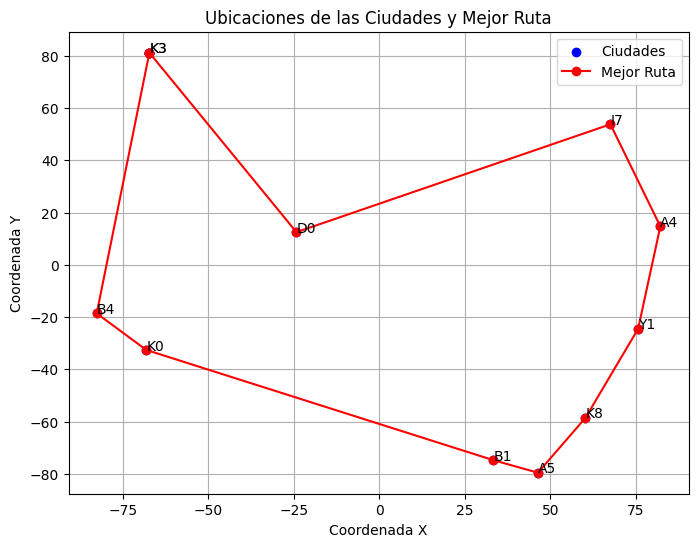

Ejecutando caso de estudio para 20 ciudades...
Tiempo de ejecución: 00:03
Distancia mínima entre nodos: 3.8013155617496466
Distancia máxima entre nodos: 231.4209368229245
Distancia promedio entre nodos: 108.60938490525389
Distancia Total mínima posible: 373.76557905278673
Distancia Total máxima posible: 533.9508272182668
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 801.5779307836817


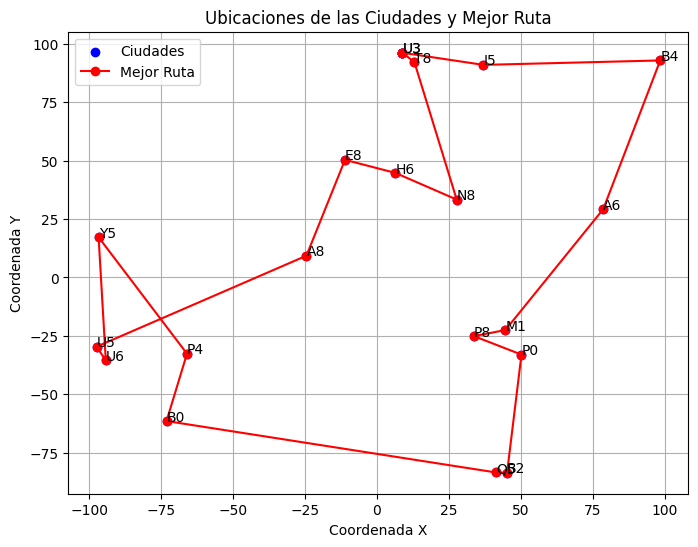

Ejecutando caso de estudio para 30 ciudades...
Tiempo de ejecución: 00:10
Distancia mínima entre nodos: 3.0066592756745814
Distancia máxima entre nodos: 231.76170952079207
Distancia promedio entre nodos: 103.79075488242108
Distancia Total mínima posible: 541.9968768523355
Distancia Total máxima posible: 774.2812526461936
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 994.7224846990912


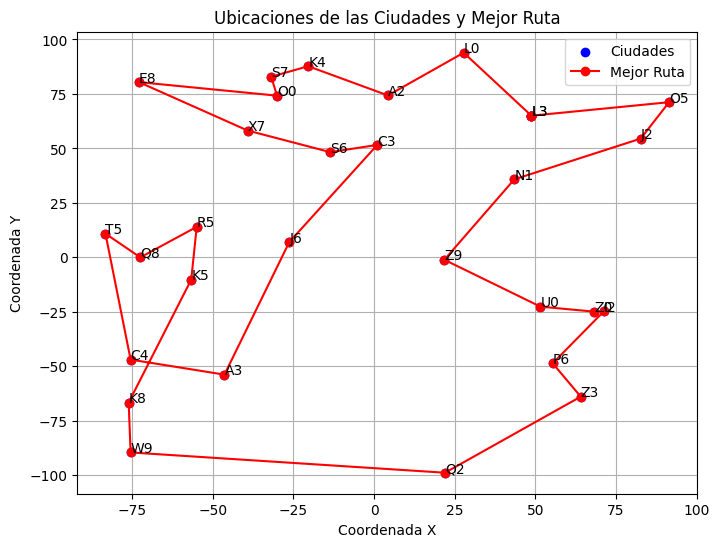

Ejecutando caso de estudio para 40 ciudades...
Tiempo de ejecución: 00:30
Distancia mínima entre nodos: 0.8944271909999126
Distancia máxima entre nodos: 258.55784652568565
Distancia promedio entre nodos: 107.68655971401962
Distancia Total mínima posible: 741.0652356267583
Distancia Total máxima posible: 1058.6646223239404
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 1290.3949866729722


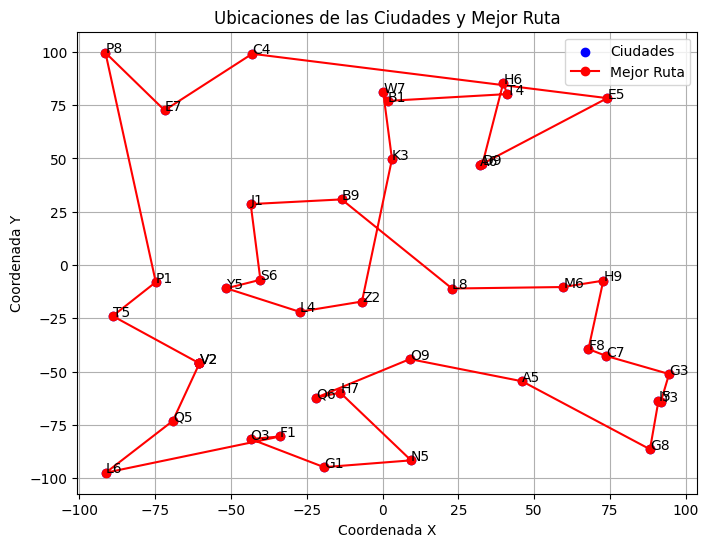

Ejecutando caso de estudio para 50 ciudades...
Tiempo de ejecución: 00:30
Distancia mínima entre nodos: 2.0615528128088343
Distancia máxima entre nodos: 234.78398582526873
Distancia promedio entre nodos: 114.33028936806319
Distancia Total mínima posible: 916.5857571743672
Distancia Total máxima posible: 1309.4082245348104
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 1396.5063398058514


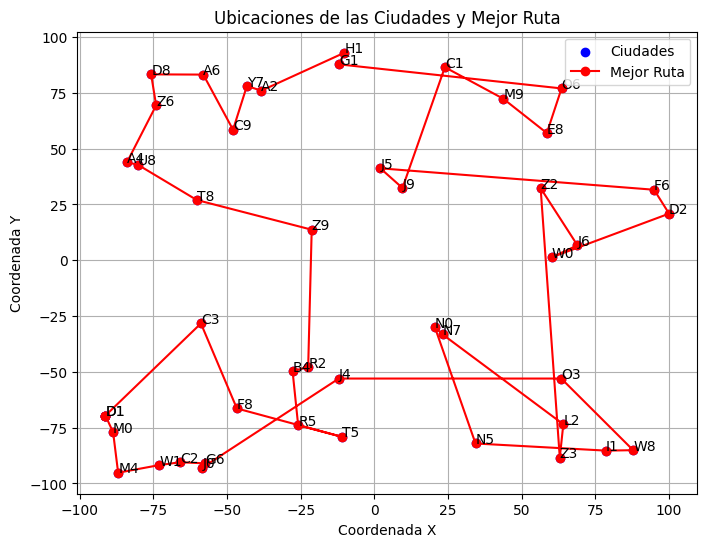

   N° Ciudades  Duración (s)  Distancia Total
0           10      0.195363       570.699563
1           20      3.278456       801.577931
2           30     10.221079       994.722485
3           40     30.236457      1290.394987
4           50     30.614101      1396.506340


In [5]:
import datetime as dt
from typing import List
import pyomo.environ as pyo
import re
import pandas as pd



#from Taller3.P2_TSP.util import generar_ciudades_con_distancias, plotear_ruta, get_min_distance, get_max_distance, \
 #   get_average_distance, get_best_max_distance_for_cities, delta_time_mm_ss, get_path, calculate_path_distance


class TSP:
    def __init__(self, ciudades, distancias, heuristics: List[str]):
        self.max_possible_distance = None
        self.min_possible_distance = None
        self.ciudades = ciudades
        self.distancias = distancias
        self.heuristics = heuristics
        self.min_distance = get_min_distance(distancias)
        self.max_distance = get_max_distance(distancias)
        self.average_distance = get_average_distance(distancias)
        self.average_distance_for_city = get_best_max_distance_for_cities(distancias)
        self.cal_min_max_distances()

    def cal_min_max_distances(self):
        # 1000 , 1500
        medium_low_distance = (self.min_distance + self.average_distance) / 2
        self.min_possible_distance = medium_low_distance * len(self.ciudades) * 0.35
        self.max_possible_distance = medium_low_distance * len(self.ciudades) * 0.50


    def print_min_max_distances(self):
        print(f"Distancia mínima entre nodos: {self.min_distance}")
        print(f"Distancia máxima entre nodos: {self.max_distance}")
        print(f"Distancia promedio entre nodos: {self.average_distance}")
        print(f"Distancia Total mínima posible: {self.min_possible_distance}")
        print(f"Distancia Total máxima posible: {self.max_possible_distance}")
        print(f"Heurísticas aplicadas: {self.heuristics}")

    def encontrar_la_ruta_mas_corta(self, tolerance, time_limit, tee):
        start_time = dt.datetime.now()

        _model = pyo.ConcreteModel()

        cities = list(self.ciudades.keys())
        n_cities = len(cities)


        # Sets to work with (conjuntos)
        _model.M = pyo.Set(initialize=self.ciudades.keys())
        _model.N = pyo.Set(initialize=self.ciudades.keys())

        # Index for the dummy variable u
        _model.U = pyo.Set(initialize=cities[1:])

        # Variables
        _model.x = pyo.Var(_model.N, _model.M, within=pyo.Binary)
        _model.u = pyo.Var(_model.N, bounds=(0, n_cities - 1))

        # Objetive Function: (función objetivo a minimizar)
        def obj_rule(model):
            return sum(self.distancias[i, j] * model.x[i, j] for i in model.N for j in model.M if i != j)

        _model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

        # Restricciones
        # Desde cada ciudad exactamente una arista
        def regla_una_entrada_una_salida_por_ciudad_desde(model, city_j):
            return sum(model.x[i, city_j]  for i in model.N if city_j != i) == 1

        _model.one_way_i_j = pyo.Constraint(_model.M, rule=regla_una_entrada_una_salida_por_ciudad_desde)

        # Hacia cada ciudad exactamente una arista
        def regla_una_entrada_una_salida_por_ciudad_hacia(model, city_i):
            return sum(model.x[city_i, j] for j in model.M if city_i != j) == 1

        _model.one_way_j_i = pyo.Constraint(_model.N, rule=regla_una_entrada_una_salida_por_ciudad_hacia)

        def rule_formando_path(model, i, j):
            if i != j:
                return model.u[i] - model.u[j] + model.x[i, j] * n_cities <= n_cities - 1
            else:
                # No se puede ir de una ciudad a la misma
                return pyo.Constraint.Skip

        _model.complete_path = pyo.Constraint(_model.U, _model.N, rule=rule_formando_path)

        def rule_asegurar_viaje(model, i, j):
            if i == j:
                return model.x[i, j] == 0
            return pyo.Constraint.Skip
        _model.no_self_travel = pyo.Constraint(_model.N, _model.M, rule=rule_asegurar_viaje)

        # Heurísticas:

        # Añadiendo limites a la función objetivo como una heurística
        if "limitar_funcion_objetivo" in self.heuristics:
            _model.obj_lower_bound = pyo.Constraint(expr=_model.obj >= self.min_possible_distance)
            _model.obj_upper_bound = pyo.Constraint(expr=_model.obj <= self.max_possible_distance)

        if "vecino_cercano" in self.heuristics:
            def rule_vecino_cercano(model, i, j):
                if i == j:
                    return pyo.Constraint.Skip
                expr = model.x[i,j] * self.distancias[i,j] <= self.average_distance_for_city[i]
                return expr
            _model.nearest_neighbor = pyo.Constraint(_model.N, _model.M, rule=rule_vecino_cercano)

        # Initialize empty set for dynamic constraints (optional)
        # _model.subtour_constraint = pyo.ConstraintList()



        # Resolver el modelo
        solver = pyo.SolverFactory('glpk')
        solver.options['mipgap'] = tolerance
        solver.options['tmlim'] = time_limit
        results = solver.solve(_model, tee=tee)

        execution_time = dt.datetime.now() - start_time
        print(f"Tiempo de ejecución: {delta_time_mm_ss(execution_time)}")
        self.print_min_max_distances()

        # Mostrar resultados
        if results.solver.termination_condition == pyo.TerminationCondition.optimal:
            print("Ruta óptima encontrada:")
        else:
            print("No se encontró una solución óptima, la siguiente es la mejor solución encontrada:")

        edges = dict()
        valid_paths = []
        for v in _model.component_data_objects(pyo.Var):
            if v.domain == pyo.Boolean and v.value is not None and v.value > 0:
                edge = re.search(r'\[(\w\d)*,(\w\d)*]', v.name)
                city1, city2 = edge.group(1), edge.group(2)
                key = f"{city1}_{city2}"
                # Esto evita caer en ciclos cerrados
                if key not in valid_paths:
                    valid_paths += [f"{city1}_{city2}", f"{city2}_{city1}"]
                    edges[city1] = city2

        initial_city = cities[0]
        path = get_path(edges, initial_city, [])
        path.append(path[0])
        distance = calculate_path_distance(self.distancias, path)
        print("Distancia total recorrida:", distance)
        return path



    def plotear_resultado(self, ruta: List[str], mostrar_anotaciones: bool = True):
        plotear_ruta(self.ciudades, ruta, mostrar_anotaciones)


def study_case_1():
    resultados = []
    for n_cities in [10, 20, 30, 40, 50]:
        print(f"Ejecutando caso de estudio para {n_cities} ciudades...")
        ciudades, distancias = generar_ciudades_con_distancias(n_cities)
        heuristics = []
        tolerance = 0.20
        time_limit = 30
        tee = False
        tsp = TSP(ciudades, distancias, heuristics)
        start_time = dt.datetime.now()  # Iniciar el cronómetro
        ruta = tsp.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
        end_time = dt.datetime.now()  # Detener el cronómetro
        duration = (end_time - start_time).total_seconds()
        distance = calculate_path_distance(distancias, ruta)
        resultados.append({"N° Ciudades": n_cities, "Duración (s)": duration, "Distancia Total": distance})
        tsp.plotear_resultado(ruta)
    resultados_df = pd.DataFrame(resultados)
    print(resultados_df)


def study_case_2():
    n_cities = 70
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    # con heuristicas
    heuristics = ['limitar_funcion_objetivo']
    # sin heuristicas
    # heuristics = []
    tsp = TSP(ciudades, distancias, heuristics)
    tolerance = 0.20
    time_limit = 40
    tee = True
    ruta = tsp.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    tsp.plotear_resultado(ruta, False)

def study_case_3():
    n_cities = 100
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    # con heuristicas
    heuristics = ['vecino_cercano']
    # sin heuristicas
    # heuristics = []
    tsp = TSP(ciudades, distancias, heuristics)
    tolerance = 0.1
    time_limit = 60
    tee = True
    ruta = tsp.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    tsp.plotear_resultado(ruta, False)


if __name__ == "__main__":
    print("Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.")
    # Solve the TSP problem
    study_case_1()
    # study_case_2()
    # study_case_3()

# Pregunta B uso parametro tee

Aplicar heuristica del limite a la funcion

In [6]:
if __name__ == "__main__":
    print("Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.")
    # Solve the TSP problem
    study_case_2()

Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --mipgap 0.2 --tmlim 40 --write /tmp/tmpk_os1awn.glpk.raw --wglp /tmp/tmpusn_8xpu.glpk.glp
 --cpxlp /tmp/tmpev7o6yum.pyomo.lp
Reading problem data from '/tmp/tmpev7o6yum.pyomo.lp'...
/tmp/tmpev7o6yum.pyomo.lp:50332: warning: lower bound of variable 'x8454' redefined
/tmp/tmpev7o6yum.pyomo.lp:50332: warning: upper bound of variable 'x8454' redefined
4293 rows, 4290 columns, 28993 non-zeros
4225 integer variables, all of which are binary
54557 lines were read
Writing problem data to '/tmp/tmpusn_8xpu.glpk.glp'...
46032 lines were written
GLPK Integer Optimizer 5.0
4293 rows, 4290 columns, 28993 non-zeros
4225 integer variables, all of which are binary
Preprocessing...
4228 rows, 4225 columns, 28928 non-zeros
4160 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.467e+02  ratio =  2.467e+02


# Pregunta C. Caso 3

3. Ejecutar el caso 2, con 70 ciudades. Se ha colocado una heurística que trata de predecir cuanto será el recorrido total. Realizar la corrida de este caso: a) con heurística y b) sin heurística. Explicar los resultados y responde

Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.
Tiempo de ejecución: 01:00
Distancia mínima entre nodos: 2.624880949681337
Distancia máxima entre nodos: 227.28946302017613
Distancia promedio entre nodos: 90.5027269606451
Distancia Total mínima posible: 1010.4345458270419
Distancia Total máxima posible: 1443.47792261006
Heurísticas aplicadas: ['limitar_funcion_objetivo']
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 1440.2114603828534
Resultados con heurísticas: Distancia total recorrida = 1440.2114603828534


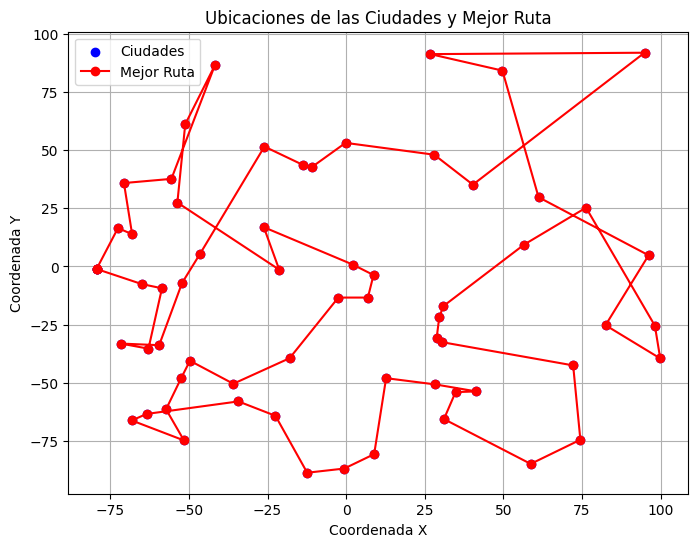

Tiempo de ejecución: 01:00
Distancia mínima entre nodos: 2.624880949681337
Distancia máxima entre nodos: 227.28946302017613
Distancia promedio entre nodos: 90.5027269606451
Distancia Total mínima posible: 1010.4345458270419
Distancia Total máxima posible: 1443.47792261006
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 1402.428143023243
Resultados sin heurísticas: Distancia total recorrida = 1402.428143023243


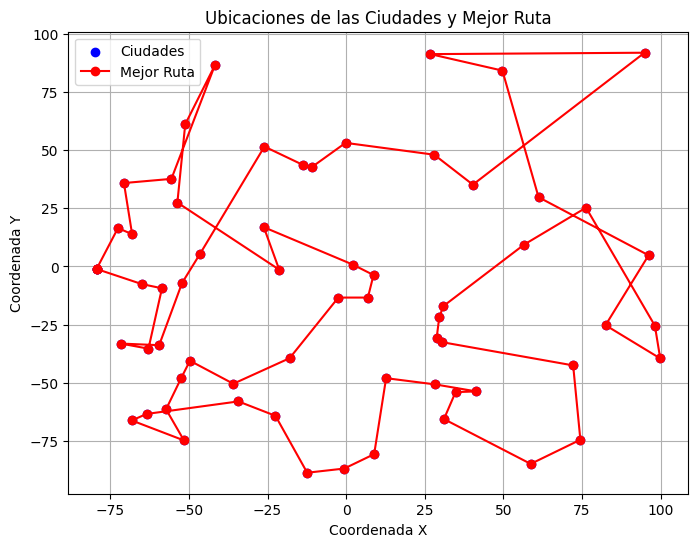

In [7]:
def study_case_2H():
    n_cities = 70
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    # con heuristicas
    heuristics = ['limitar_funcion_objetivo']
    # sin heuristicas
    #heuristics = []
    tsp = TSP(ciudades, distancias, heuristics)
    tolerance = 0.20
    time_limit = 60
    tee = False
    ruta = tsp.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    distancia_with = calculate_path_distance(distancias, ruta)
    print(f"Resultados con heurísticas: Distancia total recorrida = {distancia_with}")
    tsp.plotear_resultado(ruta, False)

    heuristicsSH = []
    tsp2 = TSP(ciudades, distancias, heuristicsSH)
    rutaSH = tsp2.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    distanciaSH = calculate_path_distance(distancias, rutaSH)
    print(f"Resultados sin heurísticas: Distancia total recorrida = {distanciaSH}")
    tsp2.plotear_resultado(ruta, False)

if __name__ == "__main__":
    print("Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.")
    # Solve the TSP problem
    study_case_2H()



# Pregunta D 100 ciudades

Ejecutar el caso 3, con 100 ciudades. Se ha colocado una heurística de vecinos cercanos. Realizar la corrida de este caso: a) con heurística y b) sin heurística. Explicar los resultados y responder

Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.
Tiempo de ejecución: 01:03
Distancia mínima entre nodos: 2.863564212655268
Distancia máxima entre nodos: 271.6741062376023
Distancia promedio entre nodos: 107.00652982701483
Distancia Total mínima posible: 1634.3176488400925
Distancia Total máxima posible: 2334.7394983429895
Heurísticas aplicadas: ['vecino_cercano']
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 1817.294134628955


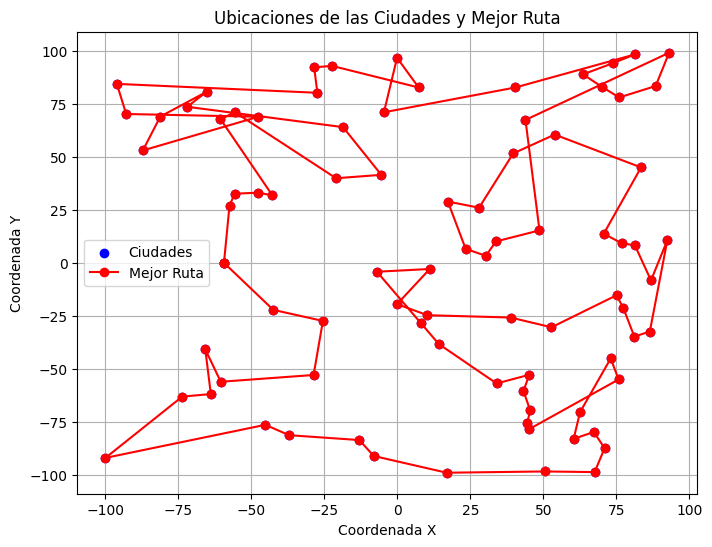

Tiempo de ejecución: 01:01
Distancia mínima entre nodos: 2.863564212655268
Distancia máxima entre nodos: 271.6741062376023
Distancia promedio entre nodos: 107.00652982701483
Distancia Total mínima posible: 1634.3176488400925
Distancia Total máxima posible: 2334.7394983429895
Heurísticas aplicadas: []
No se encontró una solución óptima, la siguiente es la mejor solución encontrada:
Distancia total recorrida: 2466.0480754633954
Resultados sin heurísticas: Distancia total recorrida = 2466.0480754633954


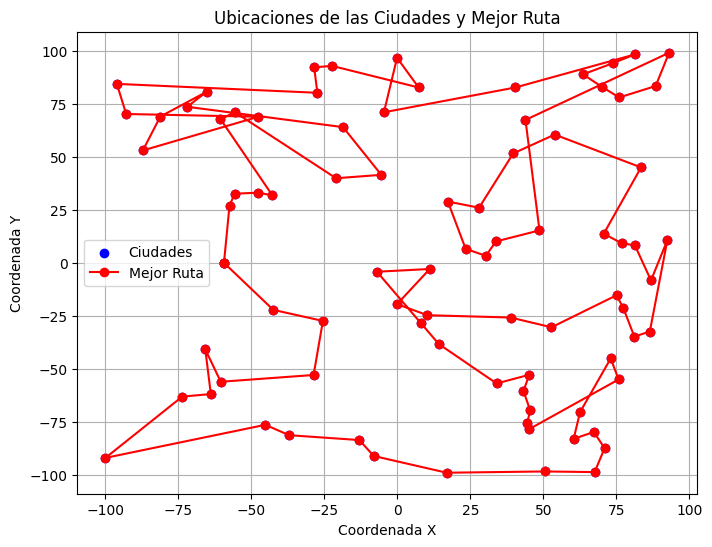

In [9]:
def study_case_3():
    n_cities = 100
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    # con heuristicas
    heuristics = ['vecino_cercano']
    # sin heuristicas
    # heuristics = []
    tsp = TSP(ciudades, distancias, heuristics)
    tolerance = 0.1
    time_limit = 60
    tee = False
    ruta = tsp.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    tsp.plotear_resultado(ruta, False)

    heuristicsSH = []
    tsp2 = TSP(ciudades, distancias, heuristicsSH)
    rutaSH = tsp2.encontrar_la_ruta_mas_corta(tolerance, time_limit, tee)
    distanciaSH = calculate_path_distance(distancias, rutaSH)
    print(f"Resultados sin heurísticas: Distancia total recorrida = {distanciaSH}")
    tsp2.plotear_resultado(ruta, False)

if __name__ == "__main__":
    print("Se ha colocado un límite de tiempo de 30 segundos para la ejecución del modelo.")
    # Solve the TSP problem
    study_case_3()